Previously, I found that the popularity of a U.S. state on Jeopardy is related 
to its popularity on wikipedia. Next I want to explore the key ideas or *keywords* that a contestant should associate with each state.

## Let's set everything up again. 

In [1]:
# This command allows plots to appear in the jupyter notebook.
%matplotlib inline   
import pandas as pd
pd.set_option('max_colwidth', 300)  # Show more text in dataframe.
# First import the pandas package and load the cleaned json file into a dataframe called df.
df = pd.read_json('JEOPARDY_QUESTIONS1_cleaned.json')
# Let's convert air_date to date/time, rather than a string.
df['air_date'] = pd.to_datetime(df['air_date'], yearfirst= True)
# Only consider data from well-sampled years.
df = df[(df['air_date']>='2004-01-01') & (df['air_date']<='2011-12-31')]

In [2]:
list_of_states = ['Alabama','Alaska','Arizona','Arkansas','California', 
                  'Colorado','Connecticut', 'Delaware', 'Florida','Georgia',
                  'Hawaii','Idaho','Illinois','Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
                  'Michigan','Minnesota','Mississippi', 'Missouri','Montana','Nebraska', 
                  'Nevada','New Hampshire', 'New Jersey','New Mexico', 'New York',
                  'North Carolina', 'North Dakota','Ohio','Oklahoma', 'Oregon',
                  'Pennsylvania', 'Rhode Island','South Carolina', 'South Dakota',
                  'Tennessee','Texas','Utah','Vermont', 'Virginia', 'Washington', 
                  'West Virginia', 'Wisconsin', 'Wyoming']

In [3]:
# Create new dataframe with only states as answers.
state_answers = df[df['answer'].isin(list_of_states)]
count_state_answers = state_answers.answer.value_counts()
state_data = pd.DataFrame(count_state_answers)
state_data.columns = ['total_count']
state_data.head()

,total_count
California,92
Florida,81
Alaska,75
Hawaii,74
Texas,73


## What keywords should you know for each state?

I got the idea of figuring out the keywords for states from an exercise I did while learning python using [Google's Python Class](https://developers.google.com/edu/python/) (which I highly recommend if you are new to python but not new to programming). The first python exercise [Basic Python Exercises](https://developers.google.com/edu/python/exercises/basic) involved counting the words in a document. I followed the same basic idea here in order to create a list of popular words for each state.

In [4]:
question_words_by_state={}
for state in list_of_states:
# Create Pandas Series of questions for each state
    this_state = state_answers[state_answers['answer'] == state]
# Loop over each state's questions and 
# create a list of words that is set as the value in the dict.
    question_list_of_words = []
    for question in this_state['question']:
        for word in question.split():
            cleaned_word = word.lower()
            question_list_of_words.append(cleaned_word)
    question_words_by_state[state] = question_list_of_words

In [5]:
# Print out top most common words for the first few states
from collections import Counter
for state in list_of_states[0:5]:
    counting = Counter(question_words_by_state[state])
    print state
    for word in counting.most_common(2):
        print ' {} {!s}'.format(word[1], word[0])

Alabama
 20 in
 16 this
Alaska
 73 the
 62 this
Arizona
 34 the
 27 in
Arkansas
 14 this
 14 the
California
 72 the
 61 in


Well, this is not very useful. The most common words are pretty boring. 

Let's create a list, somewhat arbitrarily, of common words. This list was compiled by running my loop a few times to find the most popular words and then adding the "boring" words to the `common_word` list.

In [6]:
common_words = ['the', 'in', 'this', 'of', 'state', 'a', 'is', '&', 'to', 'with', 'its', 
                'saw', "state's", 'for', "u.s.", 'was', 'i', 'all', 'that', 'on', 'as', 
                'only', 'state"', 'at', 'his', 'from', 'like', 'name', 'goes', 'known',
                'named', 'it', 'has', "it's", 'and', 'than', 'found', 'you', 'an', 'are', 'were',
               'by', 'my', 'can', "you're", 'if', 'had', 'but', 'have', 'or', 'some', 'where', 
                'part', 'take', 'but', 'about', 'near', 'what', 'now', 'he', 'after', 'became',
                'one', "(of", 'not', 'them', 'group', 'national', 'new', 'miles', 'me', 'more']

question_words_by_state={}
for state in list_of_states:
# Create Series of questions for each state
    this_state = state_answers[state_answers['answer'] == state]
# Loop over each state's questions and create a list of words that is the value in the dict.
    question_list_of_words = []
    for question in this_state['question']:
        for word in question.split():
            cleaned_word = word.lower().rstrip(",").rstrip('"').lstrip('"').lstrip('(').rstrip(')')
# Ignore common words
            if cleaned_word not in common_words:
                question_list_of_words.append(cleaned_word)
    question_words_by_state[state] = question_list_of_words

In [7]:
# Print out top most common words for the states
from collections import Counter
for state in list_of_states:
    counting = Counter(question_words_by_state[state])
    print state
    for word in counting.most_common(6):
        print ' {} {!s}'.format(word[1], word[0])

Alabama
 3 mississippi
 3 tuscaloosa
 3 mobile
 2 including
 2 crimson
 2 university
Alaska
 7 largest
 6 sitka
 6 million
 6 park
 5 include
 5 off
Arizona
 4 prescott
 4 cactus
 3 southwestern
 3 county
 3 city
 3 union
Arkansas
 3 crater
 3 diamonds
 3 little
 3 pine
 3 bluff
 3 opportunity
California
 6 san
 6 home
 6 highest
 5 county
 5 out
 5 valley
Colorado
 11 mountain
 7 highest
 5 rocky
 5 peak
 4 feet
 4 county
Connecticut
 3 charter
 3 joseph
 3 haven
 3 oak
 2 england
 2 bridgeport
Delaware
 6 first
 4 castle
 2 ratify
 2 du
 2 constitution
 2 kent
Florida
 5 park
 4 seminole
 4 southern
 4 citrus
 3 county
 3 beach
Georgia
 5 colony
 5 soviet
 4 founded
 4 augusta
 4 first
 4 union
Hawaii
 13 island
 5 big
 5 islands
 4 degrees
 4 2
 4 also
Idaho
 4 potatoes
 4 river
 3 coeur
 3 d'alene
 3 snake
 3 gem
Illinois
 4 lincoln
 4 first
 3 most
 2 over
 2 barack
 2 stephen
Indiana
 4 hoosier
 3 river
 3 wabash
 3 first
 3 city
 3 elkhart
Iowa
 4 hawkeye
 2 buque
 2 du
 2 moine

## Prescott is not the capital of Arizona

As an Arizona native, I was a bit surprised that [Prescott](https://en.wikipedia.org/wiki/Prescott,_Arizona) was so popular. Maybe these questions have to do with the fact that Prescott used to be the capital city of Arizona? Let's take a look at these questions.

In [8]:
state_answers[(state_answers['answer']=='Arizona') & 
              (state_answers['question'].str.contains('Prescott'))]

,air_date,answer,category,question,round,show_number,value
129862,2009-05-20,Arizona,ARCHITECTS,"In 1970 Paolo Soleri began building Arcosanti, an experimental town near Prescott in this state",Double Jeopardy!,5698,800.0
170985,2008-06-05,Arizona,CASING YOUR STATE,"In 1864 its capital moved from Fort Whipple to Prescott, which lost the honor in 1867, then got it back in 1877",Jeopardy!,5479,200.0
17265,2011-07-12,Arizona,NATIONAL FOREST STATES,Prescott National Forest,Jeopardy!,6192,800.0
181166,2005-11-15,Arizona,STATE THE GEOGRAPHIC CENTER,"Yavapai County, which includes Prescott National Forest",Double Jeopardy!,4872,1200.0


Hmmm... These facts aren't related to the "capital-ness" of Prescott. It seems like a contestant just needs to know that Prescott is in the state of Arizona in order to be able to answer these questions. 

What about the questions about Phoenix, the current capital of Arizona? What do these look like?

In [9]:
state_answers[state_answers['question'].str.contains('Phoenix')]

,air_date,answer,category,question,round,show_number,value
163376,2004-05-05,Arizona,THE SOUTH OF...,"Tucson, the second-largest city in this state, is about 100 miles south of its largest city, Phoenix",Jeopardy!,4538,200.0
212870,2009-04-23,Louisiana,THAT'S NOT WHERE YOU THINK IT IS,This state's Phoenix welcomes y'all! Perhaps you'll also visit its Oak Ridge or Thibodaux,Jeopardy!,5679,400.0


Phoenix isn't generally used as part of the question, but maybe it's more likely to be the answer.

In [10]:
# Phoenix, the state's capital isn't featuree prominently in questions about the state, 
# but perhaps that's because it's more often featured as the answer to a question about Arizona.
df[df['answer']=='Phoenix']

,air_date,answer,category,question,round,show_number,value
11612,2006-03-03,Phoenix,STATE CAPITAL BIRTHPLACES,Former senator Barry Goldwater,Jeopardy!,4950,400.0
128313,2004-06-15,Phoenix,SCRAMBLED STATE CAPITALS,Oxen hip,Double Jeopardy!,4567,400.0
133263,2008-03-04,Phoenix,SPACE: 2007,A NASA Mars lander has this mythic name because it was made of parts from a scrapped 2001 mission,Final Jeopardy!,5412,NaN
134425,2008-11-13,Phoenix,SPORTS TEAM HOMES,"The NHL's Coyotes have a howling good time here (well, Glendale, actually)",Jeopardy!,5564,800.0
16999,2009-10-14,Phoenix,THE SANDRA DAY O'CONNOR CHRONICLES,In 2000 O'Connor attended the dedication of the federal courthouse named for her in this state capital,Double Jeopardy!,5768,3000.0
18163,2007-07-20,Phoenix,STATE CAPITALS,Tempe is a southern suburb of this state capital,Jeopardy!,5280,800.0
188344,2010-01-21,Phoenix,U.S. MOUNTAINS,Camelback Mountain is a prominent landmark in the metropolitan area of this Arizona capital,Jeopardy!,5839,200.0
19922,2010-11-19,Phoenix,POP & ROCK,"""Lisztomania"" was a 2010 hit for this French band with the name of an American city",Double Jeopardy!,6025,2000.0
201542,2010-09-23,Phoenix,ONE HOT TOWN,"If it's July, ""by the time you get to"" this state capital founded in 1870, you'll be sweatin'; it averages 930",Double Jeopardy!,5984,1200.0
210088,2008-01-09,Phoenix,WORDS IN HARRY POTTER TITLES,"A southwest city founded in 1870, & remember, ""Harry Potter & the Wonders of Yuma"" was never written",Jeopardy!,5373,600.0


In [11]:
df[df['answer']=='Phoenix'].count()

air_date       16
answer         16
category       16
question       16
round          16
show_number    16
value          15
dtype: int64

It looks like for Arizona, it's more important to know the name of the capital when given the state, rather than vice versa. 

## State the capital.

I wonder if this relationship holds true for other states. To do this, I'll need to compile a list of state capitals.

In [12]:
state_capitals = {'Alabama': 'Montgomery', 'Alaska': 'Juneau', 'Arizona': 'Phoenix', 
                  'Arkansas': 'Little Rock', 'California': 'Sacramento', 
                  'Colorado': 'Denver', 'Connecticut': 'Hartford', 'Delaware': 'Dover', 
                  'Florida': 'Tallahassee', 'Georgia': 'Atlanta', 'Hawaii': 'Honolulu', 
                  'Idaho': 'Boise', 'Illinois': 'Springfield', 'Indiana': 'Indianapolis', 
                  'Iowa': 'Des Moines', 'Kansas': 'Topeka', 'Kentucky': 'Frankfort', 
                  'Louisiana': 'Baton Rouge', 'Maine': 'Augusta', 'Maryland': 'Annapolis', 
                  'Massachusetts': 'Boston', 'Michigan': 'Lansing', 'Minnesota': 'St. Paul', 
                  'Mississippi': 'Jackson', 'Missouri': 'Jefferson City', 'Montana': 'Helena', 
                  'Nebraska': 'Lincoln', 'Nevada': 'Carson City', 'New Hampshire': 'Concord', 
                  'New Jersey': 'Trenton', 'New Mexico': 'Santa Fe', 'New York': 'Albany', 
                  'North Carolina': 'Raleigh', 'North Dakota': 'Bismarck', 'Ohio': 'Columbus', 
                  'Oklahoma': 'Oklahoma City', 'Oregon': 'Salem', 'Pennsylvania': 'Harrisburg', 
                  'Rhode Island': 'Providence', 'South Carolina': 'Columbia', 
                  'South Dakota': 'Pierre', 'Tennessee': 'Nashville', 'Texas': 'Austin', 
                  'Utah': 'Salt Lake City', 'Vermont': 'Montpelier', 'Virginia': 'Richmond', 
                  'Washington': 'Olympia', 'West Virginia': 'Charleston', 'Wisconsin': 'Madison', 
                  'Wyoming': 'Cheyenne'}

Now let's compare the number of questions for the following cases

A) the state is the answer and the capital appears in the question 

and

B) the capital appears as the answer and the state appears in the question.

Case | Question contains | Answer contains
---| --- |---
A| capital | state
B| state| capital


In [13]:
state_capital_count = {}
countAlist = []
countBlist = []
for state in state_capitals:
    capital = state_capitals[state]
    countA = state_answers[(state_answers['question'].str.contains(capital)) & 
                          (state_answers['answer'] == state)]['answer'].count()
    countB = df[(df['answer']==capital) & 
                (df['question'].str.contains(state))]['answer'].count()
    countAlist.append(countA)
    countBlist.append(countB)
    state_capital_count[state] = [countA, countB]

In [14]:
print state_capital_count

{'Mississippi': [2, 1], 'Oklahoma': [0, 0], 'Delaware': [2, 3], 'Minnesota': [0, 1], 'Illinois': [2, 1], 'Arkansas': [3, 4], 'New Mexico': [1, 3], 'Ohio': [0, 9], 'Indiana': [0, 1], 'Maryland': [0, 2], 'Louisiana': [1, 0], 'Texas': [1, 4], 'Wyoming': [1, 1], 'Tennessee': [0, 5], 'Arizona': [1, 2], 'Wisconsin': [2, 3], 'Michigan': [0, 1], 'Kansas': [2, 2], 'Utah': [0, 1], 'Virginia': [0, 3], 'Oregon': [0, 3], 'Connecticut': [2, 4], 'Montana': [0, 1], 'California': [1, 4], 'Idaho': [0, 1], 'West Virginia': [0, 2], 'South Carolina': [1, 1], 'New Hampshire': [0, 3], 'Massachusetts': [0, 3], 'Vermont': [0, 2], 'Georgia': [0, 2], 'North Dakota': [2, 0], 'Pennsylvania': [1, 2], 'Florida': [0, 3], 'Alaska': [0, 1], 'Kentucky': [2, 2], 'Hawaii': [0, 0], 'Nebraska': [1, 4], 'Missouri': [0, 2], 'Iowa': [2, 4], 'Alabama': [0, 3], 'Rhode Island': [4, 4], 'South Dakota': [0, 0], 'Colorado': [0, 1], 'New Jersey': [0, 2], 'Washington': [0, 1], 'North Carolina': [0, 0], 'New York': [0, 4], 'Nevada': [0

In [15]:
import numpy as np
print np.mean(countAlist)
print np.mean(countBlist)

0.68
2.18


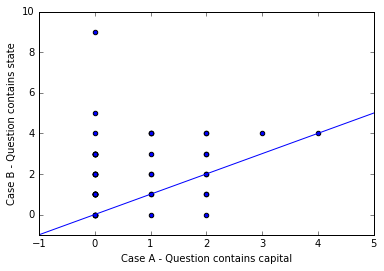

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Case A - Question contains capital')
plt.ylabel('Case B - Question contains state')
plt.scatter(countAlist, countBlist, marker = 'o')
plt.xlim(xmin=-1)
plt.ylim(ymin=-1)
plt.plot([-1, 20], [-1,20]);

The blue line shows the one-to-one line. If the points were all along this line then there would be just as many questions in Case A as Case B.

Therefore, it looks like the results for Arizona hold, in general, for the rest of states, with only three outliers. A question is more likely to contain the state's name and expect the capital city as an answer, rather than vice versa.

Case | Question contains | Answer contains  | average count
---| --- |---| ---
A| capital | state | 1.7
B| state| capital | 6.26

By the way, those outliers are...

In [17]:
for state in state_capital_count:
    capital = state_capitals[state]
    if state_capital_count[state][0] > state_capital_count[state][1]:
        print capital+", "+  state

Jackson, Mississippi
Springfield, Illinois
Baton Rouge, Louisiana
Bismarck, North Dakota
